In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
def download(path,name):
    with open(name,"wb") as csv_file:
        csv_file.write(requests.get(path).content)

In [4]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv'
download(path,"china_gdp.csv")

In [6]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [7]:
x_data, y_data = (df["Year"].values, df["Value"].values)

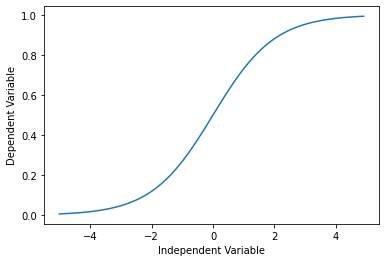

In [12]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [13]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [14]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [15]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid,xdata,ydata)
print(popt)

[690.45301729   0.99720713]


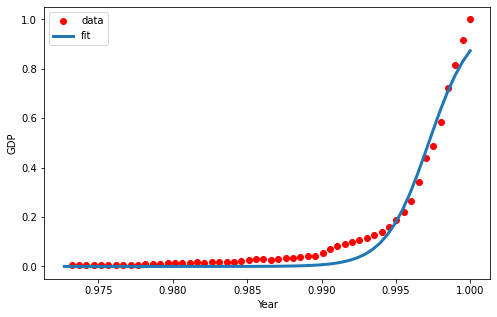

In [20]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x,*popt)
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [29]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
train_y = ydata[msk]
test_x = xdata[~msk]
test_y = ydata[~msk]

popt,pcov = curve_fit(sigmoid,train_x,train_y)
y_hat = sigmoid(test_x,*popt)
print(f"Mean Absolute Error: {np.mean(np.absolute(y_hat-test_y))}")
print(f"Residual Sum of Squares: {np.mean((y_hat-test_y) ** 2)}")
from sklearn.metrics import r2_score
print(f"R2-score: {r2_score(test_y,y_hat)}")

[1963 1967 1975 1982 1987 1999 2001 2002 2012]
Mean Absolute Error: 0.033953662431396574
Residual Sum of Squares: 0.0017554741152001456
R2-score: 0.9706756453113167
